In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
from datetime import datetime, timedelta   

In [2]:
input_folder = '../data/bycity'

In [3]:
year_set = set(datetime(2021,1,1) + timedelta(days=i) for i in range(365))

In [24]:
cnt = 0
for p in glob(os.path.join(input_folder, '*.csv')):
    df = pd.read_csv(p, parse_dates=['date']).sort_values('date')
    if 360 <= len(df):
        cnt += 1

In [25]:
cnt

2983

In [5]:
miss_dates = year_set - set(df['date'])
sorted(miss_dates)

[datetime.datetime(2021, 2, 27, 0, 0),
 datetime.datetime(2021, 4, 19, 0, 0),
 datetime.datetime(2021, 4, 28, 0, 0),
 datetime.datetime(2021, 6, 24, 0, 0),
 datetime.datetime(2021, 8, 21, 0, 0),
 datetime.datetime(2021, 8, 24, 0, 0),
 datetime.datetime(2021, 9, 1, 0, 0),
 datetime.datetime(2021, 9, 11, 0, 0),
 datetime.datetime(2021, 11, 26, 0, 0),
 datetime.datetime(2021, 12, 13, 0, 0),
 datetime.datetime(2021, 12, 16, 0, 0),
 datetime.datetime(2021, 12, 17, 0, 0),
 datetime.datetime(2021, 12, 18, 0, 0),
 datetime.datetime(2021, 12, 23, 0, 0),
 datetime.datetime(2021, 12, 27, 0, 0),
 datetime.datetime(2021, 12, 29, 0, 0),
 datetime.datetime(2021, 12, 30, 0, 0)]

In [9]:
for d in sorted(miss_dates):
    if d in set(df['date']):
       print(d)
       continue

    front_last = df[df['date'] < d].iloc[-1]
    back_first = df[d < df['date']].iloc[0]

    missing_days = (back_first['date'] - front_last['date']).days - 1


    df_add = pd.DataFrame()
    df_add[['poi_id', 'poi_name', 'country_name', 'lat', 'long']] = \
      [front_last[['poi_id', 'poi_name', 'country_name', 'lat', 'long']].tolist()] * missing_days
    for c in ['mean', 'max', 'min', 'precipitation']:
        df_add[c] = np.linspace(front_last[c], back_first[c], missing_days+2)[1:-1]
    df_add['date'] = [front_last['date'] + timedelta(days=i+1) for i in range(missing_days)]

    df = df.append(df_add)
    df.sort_values(by = 'date', ignore_index= True, inplace=True)


2021-02-27 00:00:00
2021-04-19 00:00:00
2021-04-28 00:00:00
2021-06-24 00:00:00
2021-08-21 00:00:00
2021-08-24 00:00:00
2021-09-01 00:00:00
2021-09-11 00:00:00
2021-11-26 00:00:00
2021-12-13 00:00:00
2021-12-16 00:00:00
2021-12-17 00:00:00
2021-12-18 00:00:00
2021-12-23 00:00:00
2021-12-27 00:00:00
2021-12-29 00:00:00
2021-12-30 00:00:00


In [10]:
df['date'].value_counts()

2021-01-01    1
2021-09-09    1
2021-09-07    1
2021-09-06    1
2021-09-05    1
             ..
2021-05-01    1
2021-04-30    1
2021-04-29    1
2021-04-28    1
2021-12-31    1
Name: date, Length: 365, dtype: int64

In [11]:
df

,poi_id,poi_name,country_name,lat,long,mean,max,min,precipitation,date
0,98851,ヘネラルサントス,フィリピン,6.05,125.1,25.40,27.2,22.8,8.000000,2021-01-01
1,98851,ヘネラルサントス,フィリピン,6.05,125.1,26.50,31.7,22.5,1.000000,2021-01-02
2,98851,ヘネラルサントス,フィリピン,6.05,125.1,25.70,29.1,21.0,6.000000,2021-01-03
3,98851,ヘネラルサントス,フィリピン,6.05,125.1,25.60,29.0,22.5,14.000000,2021-01-04
4,98851,ヘネラルサントス,フィリピン,6.05,125.1,27.10,31.4,22.0,8.000000,2021-01-05
...,...,...,...,...,...,...,...,...,...,...
360,98851,ヘネラルサントス,フィリピン,6.05,125.1,25.85,29.8,22.2,0.000000,2021-12-27
361,98851,ヘネラルサントス,フィリピン,6.05,125.1,24.90,27.9,21.4,0.000000,2021-12-28
362,98851,ヘネラルサントス,フィリピン,6.05,125.1,25.20,28.5,22.0,1.666667,2021-12-29
363,98851,ヘネラルサントス,フィリピン,6.05,125.1,25.50,29.1,22.6,3.333333,2021-12-30


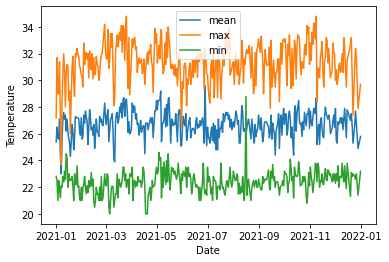

In [23]:
import matplotlib.pyplot as plt
plt.clf()
for c in ['mean', 'max', 'min']:
    plt.plot(df['date'],df[c], label=c)
plt.legend()
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()


In [54]:
np.linspace(front_last['mean'], back_first['mean'], 4)

array([-6.2       , -5.36666667, -4.53333333, -3.7       ])

In [56]:
(back_first['date'] - front_last['date']).days

3

In [71]:
df_add = pd.DataFrame()
df_add[['poi_id', 'poi_name', 'country_name', 'lat', 'long']] = \
    [front_last[['poi_id', 'poi_name', 'country_name', 'lat', 'long']].tolist()] * 2
for c in ['mean', 'max', 'min', 'precipitation']:
    df_add[c] = np.linspace(front_last[c], back_first[c], 2+2)[1:-1]
df_add['date'] = [front_last['date'] + timedelta(days=i+1) for i in range(2)]


In [72]:
df_add

,poi_id,poi_name,country_name,lat,long,mean,max,min,precipitation,date
0,1052,ハンメルフェスト,ノルウェー,70.67,23.67,-5.366667,-3.766667,-8.033333,3.6,2021-12-22
1,1052,ハンメルフェスト,ノルウェー,70.67,23.67,-4.533333,-3.033333,-6.966667,7.2,2021-12-23


In [66]:
[front_last[['poi_id', 'poi_name', 'country_name', 'lat', 'long']].tolist()] * 2

[[1052, 'ハンメルフェスト', 'ノルウェー', 70.67, 23.67],
 [1052, 'ハンメルフェスト', 'ノルウェー', 70.67, 23.67]]

In [121]:
len(df['date'].unique())

365